# Setting Up the Environment

In [176]:
# Import required libraries.
!pip install openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


The following code snippet is used to customize the look of the plots by removing the borders, setting the color palette and setting the font family.

In [177]:
# Parameters to remove the border around the plots.
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False
}

# Set seaborn theme.
sns.set_theme(style='whitegrid',
              context='notebook',
              palette=sns.color_palette("CMRmap"),
              rc=custom_params)

# Set the font family.
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.serif"] = "Times New Roman"

## Importing the Data Set

In this part, we imported the data set and checked to see if there are bad values by using simple methods such as `.describe()` and `.info()`.

In [178]:
# Import the data set.
data = pd.read_excel("tractor_price.xlsx")

In [179]:
# Take a look at the first 5 rows.
data.head()

,price,horsepower,brand,number_of_cylinder,number_of_clicking_rate,number_of_failure,province,warranty_period,age,warranty_period_unit
0,2.177423e+06,143.0,New Holland,5.0,NaN,1.0,NaN,1.0,8.0,year
1,NaN,133.0,New Holland,6.0,10.65,3.0,Ankara,2.0,6.0,year
2,2.294503e+06,149.0,NEW HOLLAND,5.0,11.45,3.0,Ankara,1.0,0.0,year
3,2.015005e+06,129.0,New Holland,6.0,10.45,2.0,Ankara,1.0,9.0,year
4,1.000000e+16,145.0,New Holland,5.0,11.25,3.0,Ankara,2.0,3.0,year


In [180]:
# Take a look at the last 5 rows.
data.tail()

,price,horsepower,brand,number_of_cylinder,number_of_clicking_rate,number_of_failure,province,warranty_period,age,warranty_period_unit
110,1832116.0,110.0,Solis,4.0,9.50,5.0,Aydın,3.0,5.0,YEAR
111,2140187.0,NaN,Solis,NaN,10.55,2.0,Aydın,NaN,1.0,year
112,1939871.0,121.0,Solis,6.0,10.05,2.0,Aydın,1.0,7.0,year
113,2161915.0,134.0,Solis,6.0,10.70,2.0,Aydın,4.0,1.0,year
114,2291568.0,NaN,Solis,5.0,11.35,NaN,Aydın,4.0,0.0,year


Looking at the first and the last 5 rows, we can immediately see that some columns have problems.
- There are `NaN` values in almost all the columns.
- There is at least one outlier in the `price` column.
- Some of the brand names haven't been spelled using the correct capitalization.

In [181]:
# Basic information about the columns and their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    102 non-null    float64
 1   horsepower               102 non-null    float64
 2   brand                    102 non-null    object 
 3   number_of_cylinder       106 non-null    float64
 4   number_of_clicking_rate  103 non-null    float64
 5   number_of_failure        108 non-null    float64
 6   province                 104 non-null    object 
 7   warranty_period          105 non-null    float64
 8   age                      106 non-null    float64
 9   warranty_period_unit     99 non-null     object 
dtypes: float64(7), object(3)
memory usage: 9.1+ KB


None of the column data types seem to be out of the ordinary. However, we can see that there are quite a lot of `NaN` values in some of the columns.

In [182]:
# Descriptive statistics of numerical fields.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,102.0,5.882353e+14,2.364561e+15,1823910.0,1967005.750,2141586.5,2229821.75,1.000000e+16
horsepower,102.0,1.316667e+02,1.258345e+01,110.0,120.000,134.0,145.00,1.500000e+02
number_of_cylinder,106.0,5.254717e+00,8.054732e-01,4.0,5.000,5.0,6.00,6.000000e+00
number_of_clicking_rate,103.0,1.057087e+01,6.213728e-01,9.5,9.975,10.7,11.20,1.150000e+01
number_of_failure,108.0,2.546296e+00,1.665394e+00,0.0,1.000,2.0,3.00,9.000000e+00
warranty_period,105.0,6.295238e+00,1.060200e+01,1.0,2.000,3.0,4.00,4.800000e+01
age,106.0,1.082075e+01,2.190925e+01,0.0,3.000,6.0,9.00,9.900000e+01


- The outlier(s) in the `price` column seem to have affected the mean and the standard deviation quite a bit.
- The maximum value of the `age` column is 99, which might be an outlier.

In [183]:
# Descriptive statistics of categorical fields
data.describe(include="O").T

,count,unique,top,freq
brand,102,5,New Holland,68
province,104,3,Konya,47
warranty_period_unit,99,4,year,70


- We can see that "New Holland" tractors are the majority.
- Konya is the province where most of the tractors are sold.
We should keep in mind that these results may not be all that accurate considering that `pandas` is case-sensitive.

In [184]:
# Number of null values in each column and their relative frequencies.
q = data.isna().sum().to_frame().rename(columns={0: 'frequency'})
q['relative_frequency'] = q / data.shape[0]
q.round(2)

,frequency,relative_frequency
price,13,0.11
horsepower,13,0.11
brand,13,0.11
number_of_cylinder,9,0.08
number_of_clicking_rate,12,0.10
number_of_failure,7,0.06
province,11,0.10
warranty_period,10,0.09
age,9,0.08
warranty_period_unit,16,0.14


The column `warranty_period_unit` has the most amount of `NaN`s with around 14% of the values being `NaN`. However, only 6% of the values in `number_of_failure` column are `NaN`.

# Data Tidying and Cleaning 

We start to fix inconsistencies in the data set.

## String Formatting for Categorical Variables

The following function, `categorical_inspect()`, takes a column name and prints the number of null values and the number of unique values in the specified column. It also prints the frequency of each unique value.

In [185]:
# Function for inspecting categoric variables.
def categorical_inspect(col):
    print("Null:", data[col].isna().sum()) # Print  the number of null values.
    print("Unique:", data[col].nunique()) # Print the number of unique values, note that this does not count null.
    print()
    print(data[col].value_counts()) # Print the value counts

### Column: brand

In [186]:
categorical_inspect("brand")

Null: 13
Unique: 5

New Holland        68
Massey Ferguson    20
Solis               7
NEW HOLLAND         6
New Netherland      1
Name: brand, dtype: int64


- "New Holland" and "NEW HOLLAND" are the same brand, so we should fix the case problem.
- "New Netherland" is not a real brand. We think someone might have written the wrong name by accident.

In [187]:
# Fix the case error and also use `.strip()` in case there is any leading or trailing whitespace.
data.brand = data.brand.str.strip().str.title()

In [188]:
# Replace "New Netherland" with "New Holland".
data.loc[data.brand == "New Netherland", "brand"] = "New Holland"

In [189]:
categorical_inspect("brand")

Null: 13
Unique: 3

New Holland        75
Massey Ferguson    20
Solis               7
Name: brand, dtype: int64


The number of unique brand names have been reduced to 3. There are still null values, but they will be fixed.

### Column: warranty_period_unit

We applied the same steps as we did with the `brand` columnn.

In [190]:
categorical_inspect("warranty_period_unit")

Null: 16
Unique: 4

year     70
 yeAR    15
month    10
YEAR      4
Name: warranty_period_unit, dtype: int64


A simple `.strip()` followed by `.title()` should fix the problem.

In [191]:
data.warranty_period_unit = data.warranty_period_unit.str.strip().str.title()

In [192]:
categorical_inspect("warranty_period_unit")

Null: 16
Unique: 2

Year     89
Month    10
Name: warranty_period_unit, dtype: int64


### Column: province
We applied `.strip()` in case there is any leading or trailing whitespace.

In [193]:
data.province = data.province.str.strip()
categorical_inspect("province")

Null: 11
Unique: 3

Konya     47
Aydın     38
Ankara    19
Name: province, dtype: int64


Nothing to fix in this column.

## Verifying the Uniformity of Units

As we have seen, `warranty_period_unit` consists of two values: "Year" and "Month". We are only using the "Year". So, we divide the "Month" values by 12 in order to make it all in terms of "Year".

In [194]:
# Convert units.
data.loc[data.warranty_period_unit == "Month", 'warranty_period'] /= 12

In [195]:
# Check if there is still any outliers.
data[['warranty_period']].describe().T

,count,mean,std,min,25%,50%,75%,max
warranty_period,105.0,3.047619,1.187928,1.0,2.0,3.0,4.0,5.0


The minimum and the maximum are in the correct interval. Since all the data is in terms of year, `warranty_period_unit` is no longer needed. Thus, we drop it.

In [196]:
data.drop(columns=["warranty_period_unit"], inplace=True)

## Outliers

In [197]:
def detect_outlier(col, multiplier=1.5):
    """
    Function that detects outliers. Prints outliers if there are any. 
    
    Parameters:
        col (pd.Series): Pandas series to analyze
        multiplier (float) = 1.5: IQR multiplier for outlier analysis.
    Returns:
        upper_limit: Upper Limit for outliers
        upper: Q3
        lower: Q1
        lower_limit: Lower limit for outliers
        iqr: Interquartile range
    """

    # Get Q_1 and Q_2 in order to calculate IQR.
    upper = col.quantile(.75)
    lower = col.quantile(.25)
    iqr = upper - lower

    # Calculate the upper and lower limits.
    upper_limit = upper + multiplier * iqr
    lower_limit = lower - multiplier * iqr

    # Check if there are any values above the upper limit.
    upper_outliers = col[col > upper_limit]
    if len(upper_outliers) > 0:
        print(f"Upper outilers: {upper_outliers.values}")

    # Check if there are any values below the lower limit.
    lower_outliers = col[col < lower_limit]
    if len(lower_outliers) > 0:
        print(f"Lower outilers: {lower_outliers.values}")

    if len(upper_outliers) + len(lower_outliers) > 0:
        print(f"Total: {len(upper_outliers) + len(lower_outliers)}, Upper: {len(upper_outliers)}, Lower: {len(lower_outliers)}")
    else:
        print("No outliers")

    return upper_limit, upper, lower, lower_limit, iqr

Iterate over numerical columns and collect the results of `detect_outliers()` in a `DataFrame`.

In [198]:
# Create a `DataFrame` to store the results.
outlier_data = pd.DataFrame(columns=["upper_limit", "upper", "lower", "lower_limit", "iqr"])

# Iterate over numerical columns.
for column in data.select_dtypes(exclude="O").columns:
    print(column)
    outlier_data.loc[column, :] = detect_outlier(data[column])
    print('-' * 20)

price
Upper outilers: [1.e+16 1.e+16 1.e+16 1.e+16 1.e+16 1.e+16]
Total: 6, Upper: 6, Lower: 0
--------------------
horsepower
No outliers
--------------------
number_of_cylinder
No outliers
--------------------
number_of_clicking_rate
No outliers
--------------------
number_of_failure
Upper outilers: [7. 9.]
Total: 2, Upper: 2, Lower: 0
--------------------
warranty_period
No outliers
--------------------
age
Upper outilers: [99. 99. 99. 99. 99. 99.]
Total: 6, Upper: 6, Lower: 0
--------------------


- The `price` column has 6 outliers above the upper limit. $10^{16}$ is not an amount anybody can afford.
- Two of the tractors seem to be failing more than the others.
- There are 6 really old tractors.

In [199]:
outlier_data

,upper_limit,upper,lower,lower_limit,iqr
price,2624045.75,2229821.75,1967005.75,1572781.75,262816.0
horsepower,182.5,145.0,120.0,82.5,25.0
number_of_cylinder,7.5,6.0,5.0,3.5,1.0
number_of_clicking_rate,13.0375,11.2,9.975,8.1375,1.225
number_of_failure,6.0,3.0,1.0,-2.0,2.0
warranty_period,7.0,4.0,2.0,-1.0,2.0
age,18.0,9.0,3.0,-6.0,6.0


We filled the outliers with `None` except for the `number_of_failure` column. We think that the outliers in the `number_of_failure` column can contribute to the analysis while the outliers in the other columns are definitely invalid.

In [200]:
data.loc[data.price > outlier_data.upper_limit.price, "price"] = None
data.loc[data.age > outlier_data.upper_limit.age, "age"] = None

In [201]:
data.head(10)

,price,horsepower,brand,number_of_cylinder,number_of_clicking_rate,number_of_failure,province,warranty_period,age
0,2177423.0,143.0,New Holland,5.0,NaN,1.0,NaN,1.0,8.0
1,NaN,133.0,New Holland,6.0,10.65,3.0,Ankara,2.0,6.0
2,2294503.0,149.0,New Holland,5.0,11.45,3.0,Ankara,1.0,0.0
3,2015005.0,129.0,New Holland,6.0,10.45,2.0,Ankara,1.0,9.0
4,NaN,145.0,New Holland,5.0,11.25,3.0,Ankara,2.0,3.0
5,2094734.0,NaN,New Holland,6.0,10.50,NaN,Ankara,3.0,4.0
6,2151544.0,136.0,New Holland,6.0,10.80,7.0,Ankara,4.0,1.0
7,2242586.0,147.0,New Holland,5.0,11.35,1.0,NaN,3.0,8.0
8,2251793.0,148.0,New Holland,5.0,11.40,1.0,Ankara,4.0,9.0
9,2234020.0,143.0,New Holland,5.0,11.15,NaN,NaN,4.0,2.0


In [202]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,96.0,2.085701e+06,147210.222952,1823910.0,1941490.250,2130115.0,2219484.50,2304771.0
horsepower,102.0,1.316667e+02,12.583451,110.0,120.000,134.0,145.00,150.0
number_of_cylinder,106.0,5.254717e+00,0.805473,4.0,5.000,5.0,6.00,6.0
number_of_clicking_rate,103.0,1.057087e+01,0.621373,9.5,9.975,10.7,11.20,11.5
number_of_failure,108.0,2.546296e+00,1.665394,0.0,1.000,2.0,3.00,9.0
warranty_period,105.0,3.047619e+00,1.187928,1.0,2.000,3.0,4.00,5.0
age,100.0,5.530000e+00,3.095957,0.0,3.000,6.0,8.25,10.0


## Duplicates

In [203]:
data.duplicated().sum()

0

There are no duplicate rows.

## Missing Values and Imputation

When imputing missing values, it is important to know the mechanism by which the missingness has occurred. Doing simple mean or median imputation can lead to unwanted results such as reducing the strength of the correlation coefficient between two variables.

In [204]:
(data.isna().sum() / data.shape[0]).round(2) 

price 0.17
horsepower 0.11
brand 0.11
number_of_cylinder 0.08
number_of_clicking_rate 0.10
number_of_failure 0.06
province 0.10
warranty_period 0.09
age 0.13
dtype: float64

We have as much as 17% missing values in some columns. We decided to look into the correlation between numerical variables and try to impute values based on that.

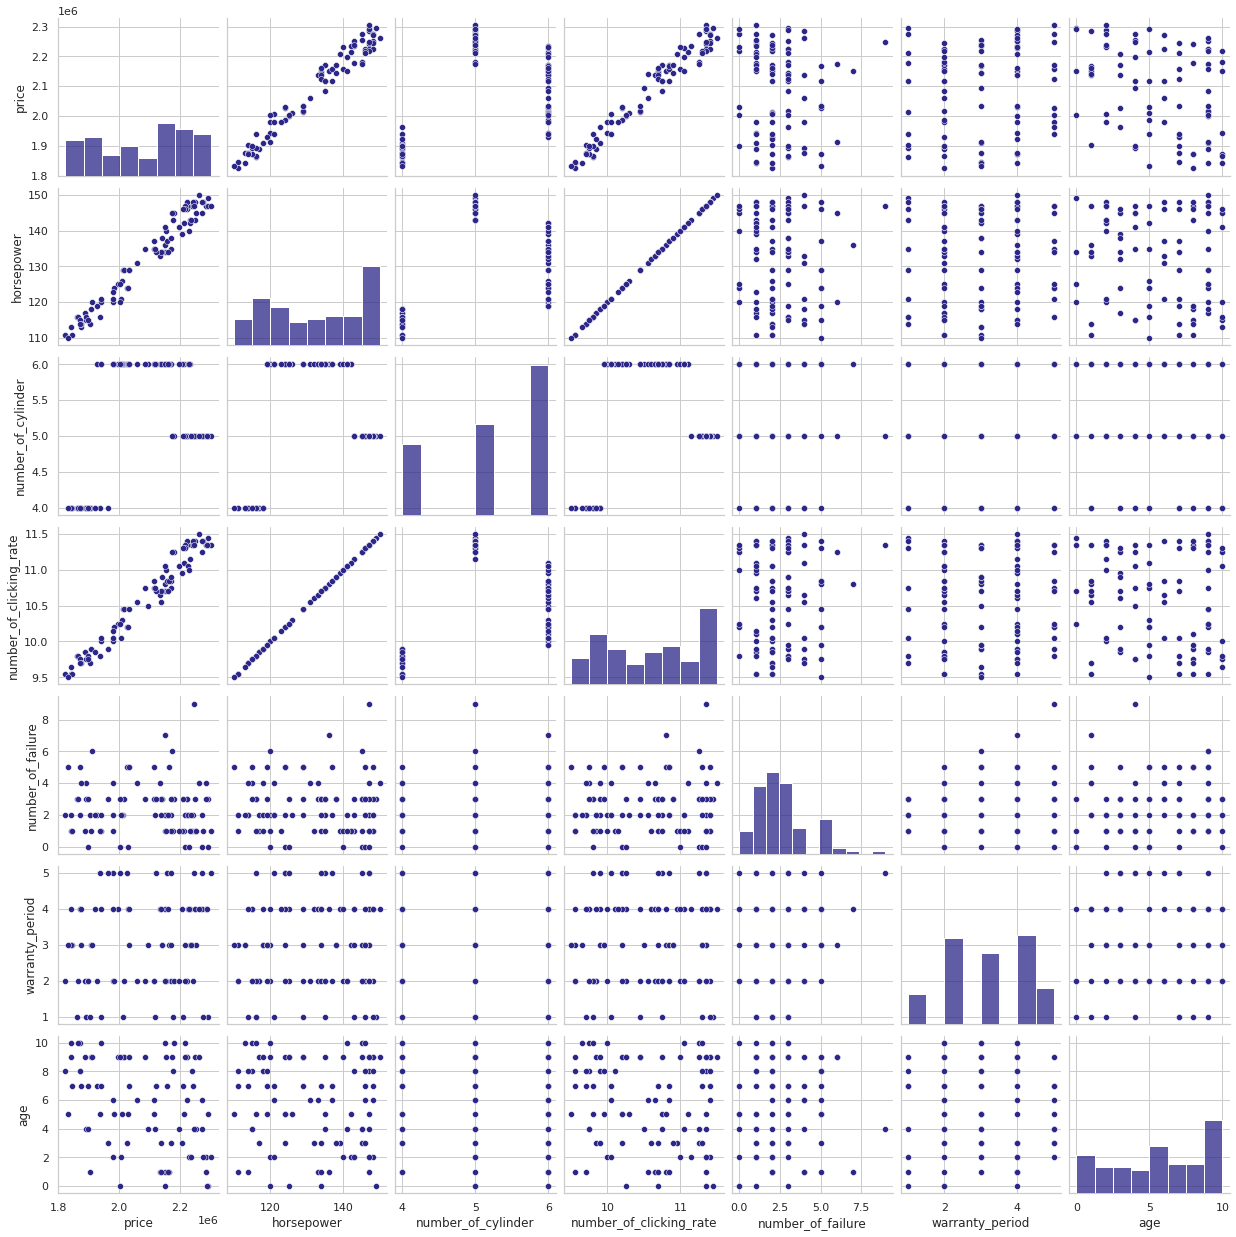

In [205]:
sns.pairplot(data=data)

In [206]:
# Compute the correlation coefficient between the numerical variables.
# Since we are only interested in the strength of the correlation, we use the absolute value.
data.corr().abs()

,price,horsepower,number_of_cylinder,number_of_clicking_rate,number_of_failure,warranty_period,age
price,1.000000,0.980406,0.392267,0.979889,0.075608,0.128622,0.333685
horsepower,0.980406,1.000000,0.272054,1.000000,0.051647,0.073068,0.089459
number_of_cylinder,0.392267,0.272054,1.000000,0.334677,0.076600,0.112630,0.131711
number_of_clicking_rate,0.979889,1.000000,0.334677,1.000000,0.041174,0.038316,0.122785
number_of_failure,0.075608,0.051647,0.076600,0.041174,1.000000,0.122701,0.074740
warranty_period,0.128622,0.073068,0.112630,0.038316,0.122701,1.000000,0.040208
age,0.333685,0.089459,0.131711,0.122785,0.074740,0.040208,1.000000


The pairplot and the correlation matrix have revealed important information. There is perfect correlation between `number_of_clicking_rate` and `horsepower`. This means that we can impute missing values based on the other column assuming that they are not `NaN` at the same time. Also the `price` column has correlation between both the `horsepower` and the `number_of_clicking_rate` columns. If we have a missing `price` value, we could use either column in order to impute the price. Based on this information, we came up with the following scenarios:

1. `horsepower` is missing
   - Use `number_of_clicking_rate` to impute
2. `number_of_clicking_rate` is missing
   - Use `horsepower` to impute
3. `price` is missing
   - Use `horsepower` to impute

### Imputing Linear Correlated Columns

In [207]:
# Do not touch the original data and impute on a copy instead.
imputed = data.copy()

In [208]:
def linear_impute(col_y, col_x):
    """
    Imputes the missing values based on the other column based on the linear correlation.

    Parameters:
        col_y (str): Name of the column to be imputed.
        col_x (str): Name of the column to impute the missing values in `col_y`.
    """
    # Select non-null values of the given columns. This is important in order
    # to calculate the coefficients for the line.
    corr_data = data[[col_x, col_y]].dropna(axis=0, how='any').astype(float)
    # Get the x and y columns as numpy arrays.
    data_x, data_y = corr_data[col_x].values, corr_data[col_y].values
    # Calculate the coefficients for the line y=ax+b.
    a, b = np.polyfit(x=data_x, y=data_y, deg=1)

    # Create the function that represents the linear line.
    line = np.vectorize(lambda x: a*x + b)

    # Only select non-null x and null y rows.
    predict = ((~imputed[col_x].isna()) & (imputed[col_y].isna()))
    # Impute.
    imputed.loc[predict, col_y] = line(imputed.loc[predict, col_x])

    # Plot the line and the given values as scatter plot. This is for visual
    # confirmation that the algorithm works as expected.
    plot_x = np.linspace(imputed[col_x].min(), imputed[col_x].max())
    plt.plot(plot_x, line(plot_x), color='blue')
    plt.scatter(imputed[col_x], imputed[col_y], color='red')
    plt.show()

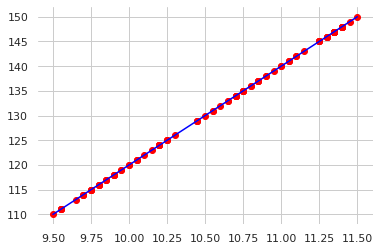

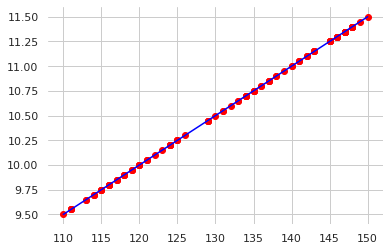

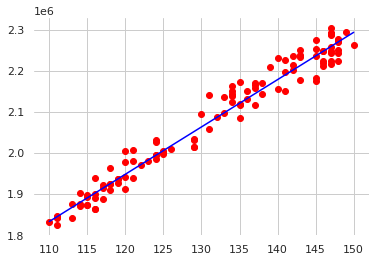

In [209]:
linear_impute("horsepower", "number_of_clicking_rate") # Impute `horsepower` using `number_of_clicking_rate`
linear_impute("number_of_clicking_rate", "horsepower") # Impute `number_of_clicking_rate` using `horsepower`
linear_impute("price", "horsepower") # Impute `price` using `horsepower`

### Imputing Based on Min and Max

In the pairplot, we can see that certain intervals of horsepower directly correspond to different number of cylinders. We checked the minimum and the maximum of horsepower by the different number of cylinders.

In [210]:
q = data.groupby('number_of_cylinder')['horsepower'].describe()[['min', 'max']]
q

,min,max
number_of_cylinder,,
4.0,110.0,118.0
5.0,143.0,150.0
6.0,119.0,142.0


- If the horsepower is between 110 and 118: 4 cylinders
- If the horsepower is between 119 and 142: 6 cylinders
- If the horsepower is between 143 and 150: 5 cylinders

Based on these findings, we imputed the missing number of cylinders.

In [211]:
for _, (cylinders, min_hp, max_hp) in q.reset_index().iterrows():
    predicate = (imputed.number_of_cylinder.isna()) & (imputed.horsepower >= min_hp) & (imputed.horsepower <= max_hp)
    imputed.loc[predicate, 'number_of_cylinder'] = cylinders

We can see that, at this point, we have elminated quite a lot of missing values. As for the rest of the numerical missing values, we used simple mean imputation in order to fill them.

### Mean Imputation

In [212]:
# Fill the rest of the null numeric values.
imputed.fillna(imputed.mean(numeric_only=True), inplace=True)

In [213]:
imputed

,price,horsepower,brand,number_of_cylinder,number_of_clicking_rate,number_of_failure,province,warranty_period,age
0,2.177423e+06,143.0,New Holland,5.0,11.15,1.000000,NaN,1.000000,8.0
1,2.098022e+06,133.0,New Holland,6.0,10.65,3.000000,Ankara,2.000000,6.0
2,2.294503e+06,149.0,New Holland,5.0,11.45,3.000000,Ankara,1.000000,0.0
3,2.015005e+06,129.0,New Holland,6.0,10.45,2.000000,Ankara,1.000000,9.0
4,2.236080e+06,145.0,New Holland,5.0,11.25,3.000000,Ankara,2.000000,3.0
...,...,...,...,...,...,...,...,...,...
110,1.832116e+06,110.0,Solis,4.0,9.50,5.000000,Aydın,3.000000,5.0
111,2.140187e+06,131.0,Solis,6.0,10.55,2.000000,Aydın,3.047619,1.0
112,1.939871e+06,121.0,Solis,6.0,10.05,2.000000,Aydın,1.000000,7.0
113,2.161915e+06,134.0,Solis,6.0,10.70,2.000000,Aydın,4.000000,1.0


In [214]:
# Correction of numerical columns after imputation
imputed["number_of_failure"] = imputed["number_of_failure"].round()
for col in ["number_of_cylinder", "number_of_failure", "warranty_period", "age", "horsepower", "price"]:
    imputed[col] = imputed[col].astype(int)
imputed.number_of_clicking_rate = imputed.number_of_clicking_rate.round(2)

### Impute Based on Index

We spotted a pattern in the `brand` and `province` columns. There is an order to the way the values appear in the data set.
1. Brand names appear in the following order:
    - "New Holland" in indexes 0 to 84
    - "Massey Ferguson" in indexes 85 to 107
    - "Solis" in indexes 108 to 114
2. Provinces appear in the following order:
    - "Ankara" in indexes 0 to 23
    - "Konya" in indexes 24 to 74
    - "Aydın" in indexes 75 to 114

We imputed the null values based on these findings as opposed to doing mode imputation.

In [215]:
# Impute the brand names
brand = imputed.columns.get_loc('brand')
imputed.iloc[:85, brand] = "New Holland"
imputed.iloc[85:108, brand] = "Massey Ferguson"
imputed.iloc[108:, brand] = "Solis"

# Impute the province names
province = imputed.columns.get_loc('province')
imputed.iloc[:24, province] = "Ankara"
imputed.iloc[24:75, province] = "Konya"
imputed.iloc[75:, province] = "Aydın"

In [216]:
imputed.isna().sum()

price 0
horsepower 0
brand 0
number_of_cylinder 0
number_of_clicking_rate 0
number_of_failure 0
province 0
warranty_period 0
age 0
dtype: int64

With that, we are finally done with missing value imputation.

In [217]:
imputed.tail(20)

,price,horsepower,brand,number_of_cylinder,number_of_clicking_rate,number_of_failure,province,warranty_period,age
95,2156862,140,Massey Ferguson,6,11.00,1,Aydın,2,9
96,1936954,119,Massey Ferguson,6,9.95,5,Aydın,3,8
97,1936954,119,Massey Ferguson,6,9.95,3,Aydın,3,5
98,2247585,146,Massey Ferguson,5,11.30,5,Aydın,4,8
99,2304771,147,Massey Ferguson,5,11.35,1,Aydın,5,2
100,1922041,117,Massey Ferguson,4,9.85,2,Aydın,4,5
101,2123459,134,Massey Ferguson,6,10.70,3,Aydın,5,7
102,2197697,141,Massey Ferguson,6,11.05,1,Aydın,2,4
103,2004597,120,Massey Ferguson,6,10.00,0,Aydın,3,0
104,1985356,124,Massey Ferguson,6,10.20,3,Aydın,2,5


# Exporting the Clean Data Set

In [218]:
imputed

,price,horsepower,brand,number_of_cylinder,number_of_clicking_rate,number_of_failure,province,warranty_period,age
0,2177423,143,New Holland,5,11.15,1,Ankara,1,8
1,2098022,133,New Holland,6,10.65,3,Ankara,2,6
2,2294503,149,New Holland,5,11.45,3,Ankara,1,0
3,2015005,129,New Holland,6,10.45,2,Ankara,1,9
4,2236080,145,New Holland,5,11.25,3,Ankara,2,3
...,...,...,...,...,...,...,...,...,...
110,1832116,110,Solis,4,9.50,5,Aydın,3,5
111,2140187,131,Solis,6,10.55,2,Aydın,3,1
112,1939871,121,Solis,6,10.05,2,Aydın,1,7
113,2161915,134,Solis,6,10.70,2,Aydın,4,1


In [219]:
imputed.to_csv('tractor_prices_cleaned.csv', index=False) # Export as a csv file.
imputed.to_excel('tractor_prices_cleaned.xlsx') # Export as an Excel file.

# Exploratory Data Analysis

In [220]:
# Since some of the values fall on top of each other, we applied a small
# amount of jittering in order to make the scatter plots more clear.

# This function applies jittering based on random numbers provided by numpy.
jitter = lambda d: d.apply(lambda x: x + (np.random.rand() - 0.5) * 0.25)

# We do not touch the original dataframe.
jittered = imputed.copy()
# Select numeric columns.
for col in jittered.select_dtypes(exclude='O'):
    jittered[col] = jitter(jittered[col])

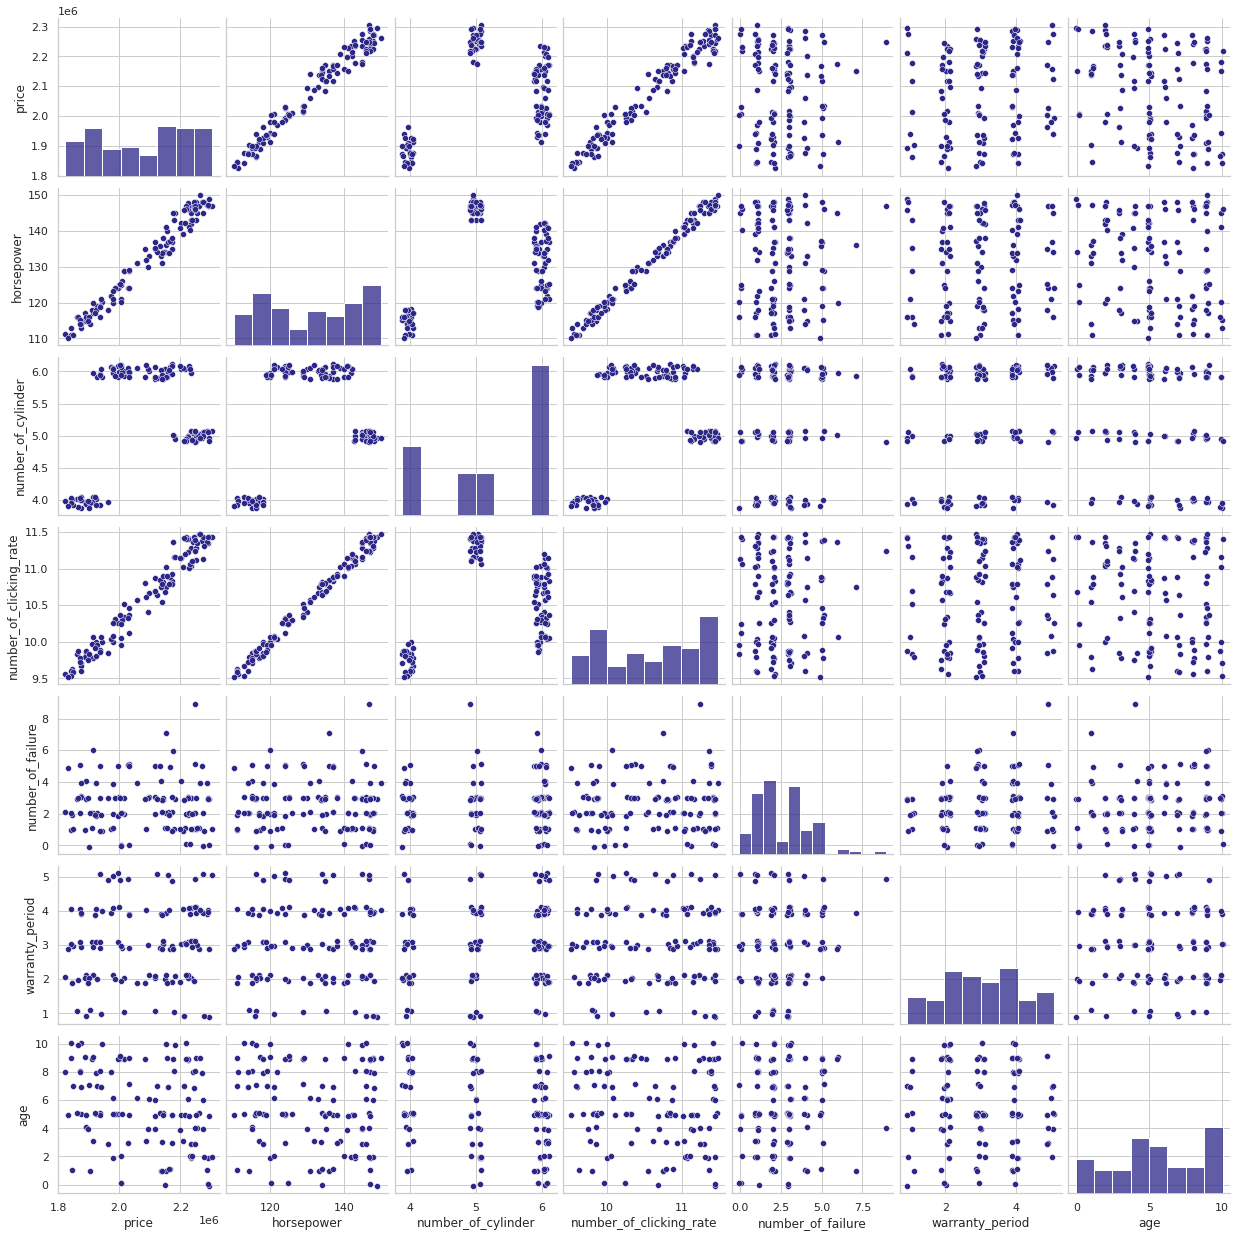

In [221]:
sns.pairplot(data=jittered)

<AxesSubplot:>

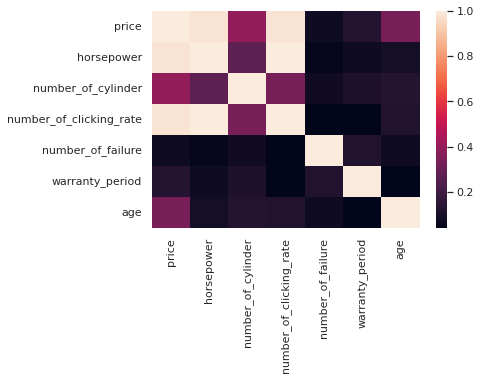

In [222]:
sns.heatmap(data.corr().abs())

## Tractor prices and what they are affected by

<AxesSubplot:xlabel='horsepower', ylabel='price'>

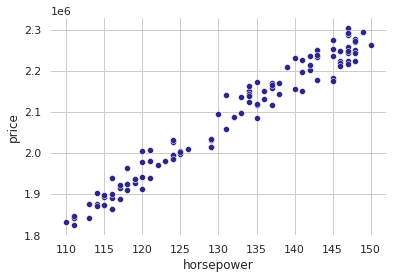

In [223]:
sns.scatterplot(data=imputed, y='price', x='horsepower')

<AxesSubplot:xlabel='number_of_cylinder', ylabel='price'>

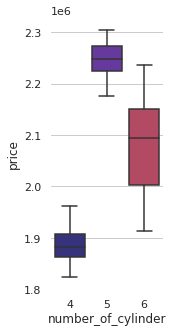

In [224]:
plt.figure(figsize=(2, 5))
sns.boxplot(data=imputed, y='price', x='number_of_cylinder')

<AxesSubplot:xlabel='number_of_failure', ylabel='price'>

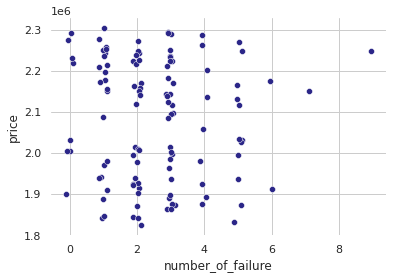

In [225]:
sns.scatterplot(data=jittered, y='price', x='number_of_failure')

## What does tractors' horsepower have relationship with?

<AxesSubplot:xlabel='number_of_cylinder', ylabel='horsepower'>

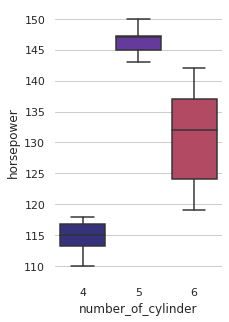

In [226]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=imputed, x='number_of_cylinder', y='horsepower')

# Research Questions

## 3

<AxesSubplot:ylabel='warranty_period'>

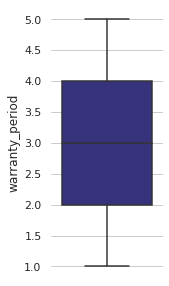

In [227]:
plt.figure(figsize=(2, 5))
sns.boxplot(data=imputed, y='warranty_period')

<AxesSubplot:ylabel='number_of_failure'>

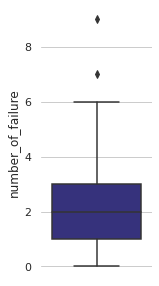

In [228]:
plt.figure(figsize=(2, 5))
sns.boxplot(data=imputed, y='number_of_failure')

In [229]:
imputed['failure_rate'] = imputed.number_of_failure / (imputed.age + 1)
imputed.failure_rate.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
failure_rate,115.0,0.539521,0.597574,0.0,0.2,0.375,0.6125,3.5


In [230]:
imputed.loc[imputed.warranty_period >= 4, "warranty"] = "Long Term"
imputed.loc[(imputed.warranty_period < 4) & (imputed.warranty_period >= 2), "warranty"] = "Standard"
imputed.loc[imputed.warranty_period < 2, "warranty"] = "Short Term"

imputed.loc[imputed.failure_rate < .20, "failure"] = "Low Failure Risk"
imputed.loc[(imputed.failure_rate >= .2) & (imputed.failure_rate <=.69), "failure"] = "Normal Failure Risk"
imputed.loc[imputed.failure_rate > .69, "failure"] = "High Failure Risk"

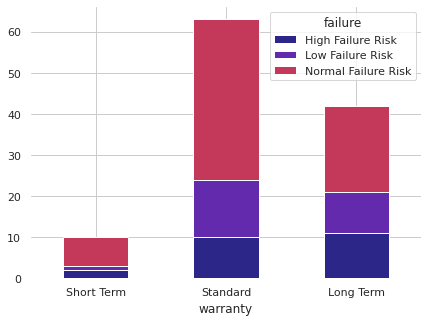

In [231]:
pivot = imputed.pivot_table(index="warranty", columns="failure", values="price", aggfunc="count", fill_value=0)
pivot.loc[["Short Term", "Standard", "Long Term"], :].plot.bar(stacked=True, figsize=(7,5))
plt.xticks(rotation=0)
plt.show()

## 11)

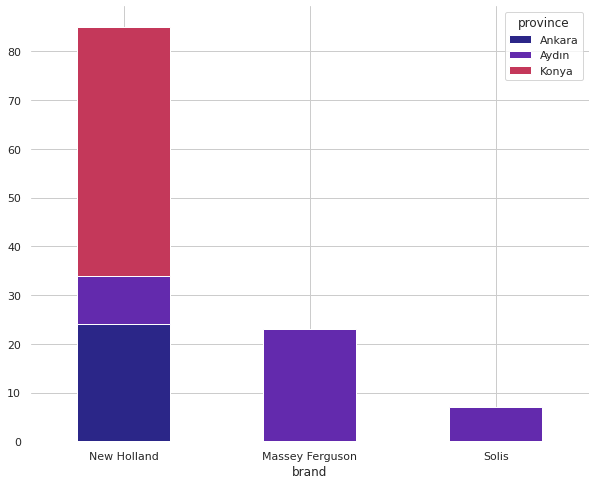

In [232]:
pivot = imputed.pivot_table(index="brand", columns="province", values="price", aggfunc="count", fill_value=0)
pivot["total"] = pivot.apply(lambda row: row.sum(), axis=1)

pivot.sort_values(by="total", ascending=False).iloc[:, :-1].plot.bar(stacked=True, figsize=(10,8))
plt.xticks(rotation=0)
plt.show()

## 4)

In [233]:
q = imputed.copy()

def age_group(age):
    if age < 4:
        return '0-3'
    elif age < 7:
        return '4-6'
    else:
        return '7-10'
q['age_group'] = q.age.apply(age_group)

<AxesSubplot:xlabel='price', ylabel='age_group'>

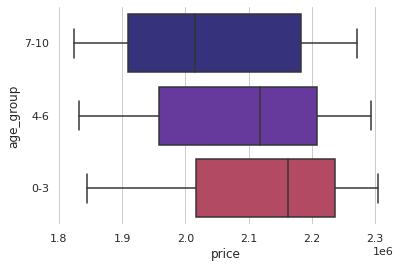

In [234]:
sns.boxplot(data=q, y='age_group', x='price')

## 8)

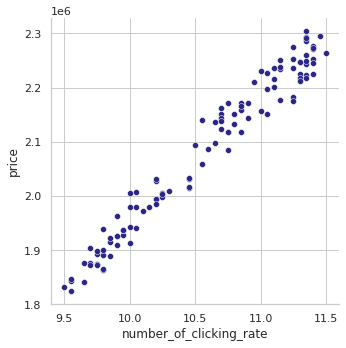

In [235]:
sns.relplot(kind='scatter', data=imputed, x='number_of_clicking_rate', y='price')

In [236]:
q = imputed.copy()

q1 = q.price.quantile(.25)
q2 = q.price.quantile(.50)
q3 = q.price.quantile(.75)
q4 = q.price.quantile(1)

def price_range(x):
    if x < q1:
        return 'q0-q1'
    elif x < q2:
        return 'q1-q2'
    elif x < q3:
        return 'q2-q3'
    else:
        return 'q3-q4'
    
q['price_range'] = q.price.apply(price_range)

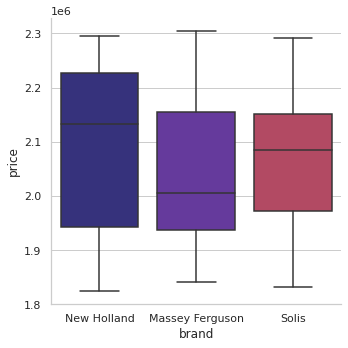

In [237]:
sns.catplot(kind='box', data=imputed, x='brand', y='price')

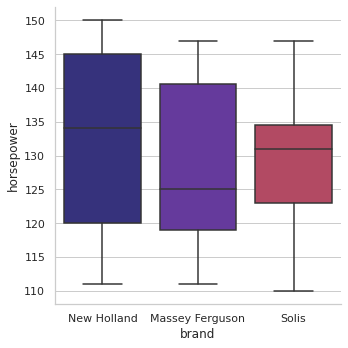

In [238]:
sns.catplot(kind='box', data=imputed, x='brand', y='horsepower')

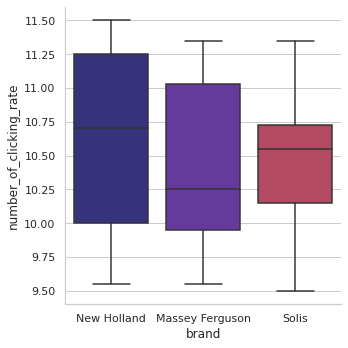

In [239]:
sns.catplot(kind='box', data=imputed, x='brand', y='number_of_clicking_rate')

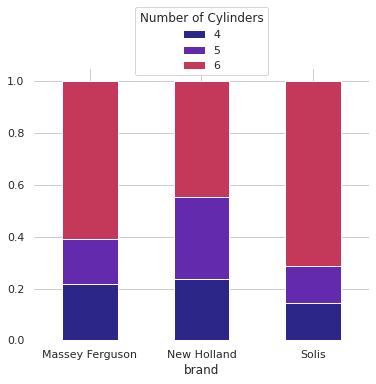

In [240]:
q = (imputed.value_counts(['brand', 'number_of_cylinder']) / imputed.value_counts(['brand'])).reset_index()
q = pd.pivot_table(q, values=0, index='brand', columns='number_of_cylinder')
q.plot.bar(stacked=True, figsize=(6, 5))
plt.xticks(rotation=0)
plt.legend(loc='center', bbox_to_anchor=(0.5, 1.1), title='Number of Cylinders')
plt.show()

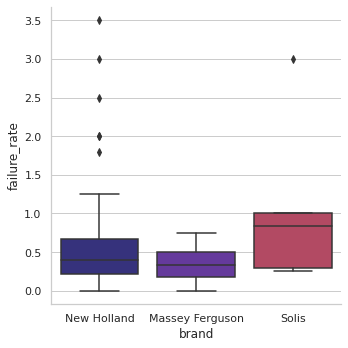

In [241]:
sns.catplot(kind='box', data=imputed, x='brand', y='failure_rate')

In [242]:
data['budget_friendly'] = data['horsepower'] / data['price']

<AxesSubplot:xlabel='brand', ylabel='budget_friendly'>

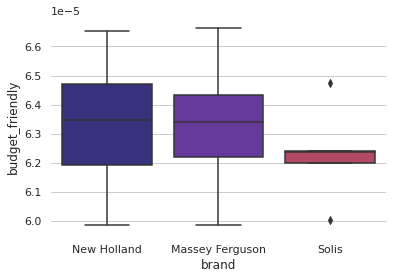

In [243]:
sns.boxplot(data=data, x='brand', y='budget_friendly')

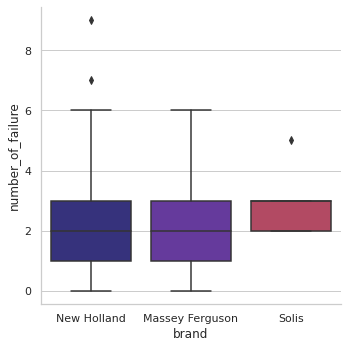

In [244]:
# brand and number_of_failure
sns.catplot(kind='box', data=imputed, x='brand', y='number_of_failure')

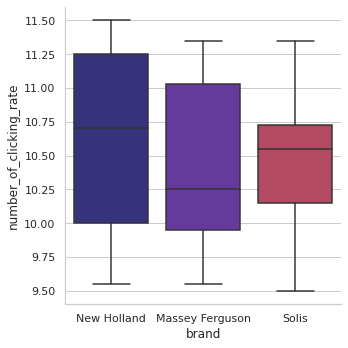

In [245]:
sns.catplot(kind='box', data=imputed, x='brand', y='number_of_clicking_rate')

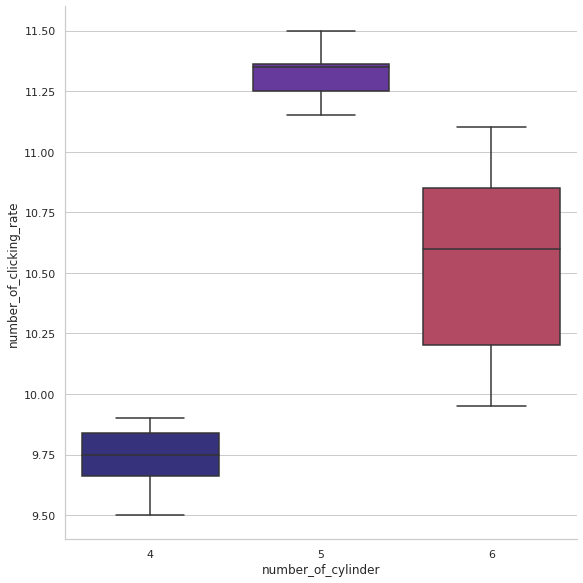

In [246]:
sns.catplot(kind='box', data=imputed, x='number_of_cylinder', y='number_of_clicking_rate', height=8.27, aspect=1)

<AxesSubplot:xlabel='horsepower', ylabel='province'>

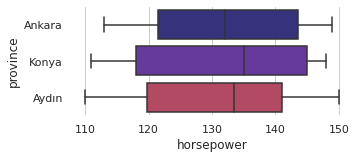

In [247]:
plt.figure(figsize=(5, 2))
sns.boxplot(data=imputed, y='province', x='horsepower')